# Preprocessing

In [1]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [4]:
import datetime

import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris

## Data load

In [6]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
diabetes = pd.read_csv('./data/diabetes.csv')
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)

def parser(x):
    return datetime.datetime.strptime('190'+x, '%Y-%m')

shampoo = pd.read_csv('./data/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

mercari_df = pd.read_csv('./data/mercari_train.tsv', sep='\t')
y_train_df = mercari_df['price']

students = pd.DataFrame({'이름':['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'], 
                         '국어': [70, 85, None, 100, None, 85], 
                         '수학':[65, 100, 80, 95, None, 70]})

health = pd.DataFrame({'연도': [2017, 2018, 2019, 2020, 2021, 2022], 
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
item_df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

## Missing Value

### (1) Find NA

In [7]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [8]:
students.isna()

,이름,국어,수학
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True
5,False,False,False


In [9]:
students.notna()

,이름,국어,수학
0,True,True,True
1,True,True,True
2,True,False,True
3,True,True,True
4,True,False,False
5,True,True,True


In [10]:
# !pip install missingno
import missingno as msno

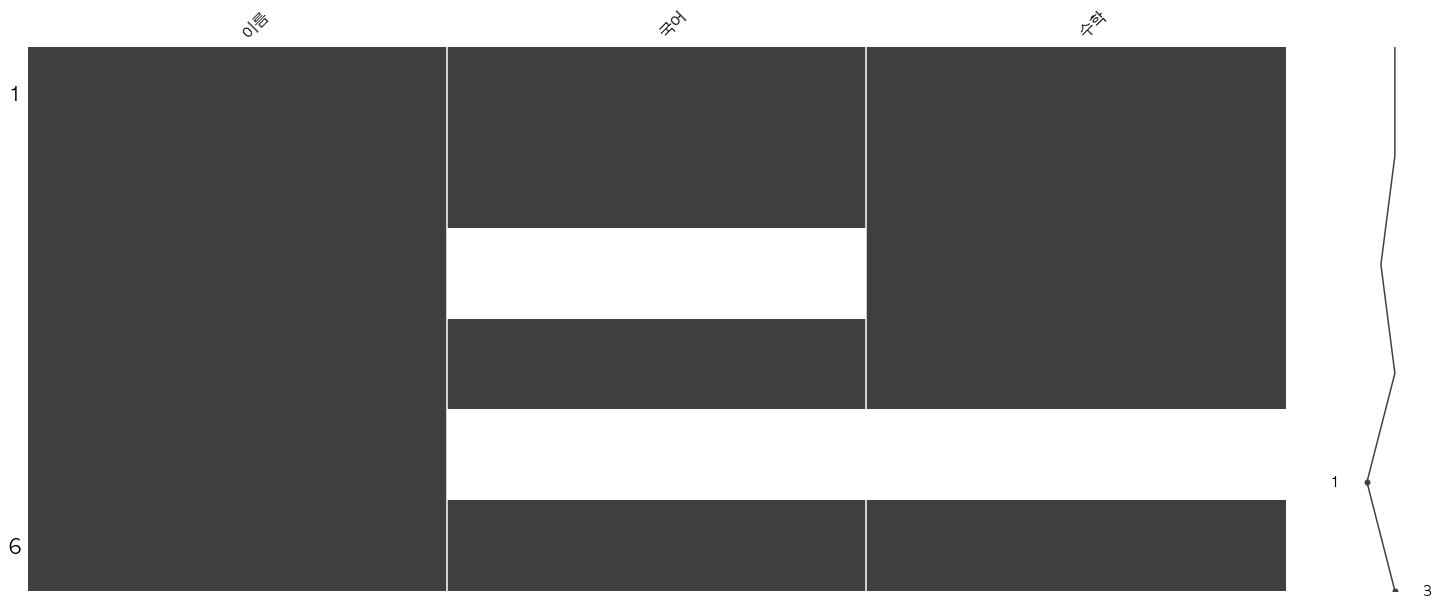

In [11]:
### Missingmap
# 큰 데이터의 missing 확인에 유용
msno.matrix(students)
plt.show()

In [12]:
### column 별 NA 개수
students.isna().sum()

이름    0
국어    2
수학    1
dtype: int64

In [13]:
### row 별 NA 개수
students.isna().sum(1)

0    0
1    0
2    1
3    0
4    2
5    0
dtype: int64

In [14]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### (2) Drop NA

In [16]:
students.dropna() # 결측 행 삭제, axis 변수 또는 'index'/'columns'으로 행/열 조정 가능

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [17]:
students.dropna(thresh=2) # 결측값 아닌 개수 지정

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [18]:
students.dropna(subset=['수학']) # subset에 NA가 있는 경우 제거

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [19]:
students.dropna(how='all', subset=['국어', '수학']) # 국어, 수학이 모두 NA이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [20]:
students.dropna(how='any') # 한 컬럼 이상이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


### (3) Fill NA

In [21]:
### 값 채우기
students.fillna(value=0)

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,0.0,80.0
3,팥쥐,100.0,95.0
4,해님,0.0,0.0
5,달님,85.0,70.0


In [22]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [23]:
health # original table

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
1,2018,162.0,52.0,NaN,NaN
2,2019,165.0,NaN,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,NaN
5,2022,166.0,54.0,0.8,1.0


In [24]:
health.fillna(0)

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,0.0,0.0
2,2019,165.0,0.0,1.2,0.0
3,2020,0.0,50.0,1.2,2.0
4,2021,0.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [25]:
health.fillna(health.mean()) # 평균으로 채우기

,연도,키,몸무게,시력,병결
0,2017,160.00,53.0,1.2,1.5
1,2018,162.00,52.0,1.1,1.5
2,2019,165.00,52.0,1.2,1.5
3,2020,163.25,50.0,1.2,2.0
4,2021,163.25,51.0,1.1,1.5
5,2022,166.00,54.0,0.8,1.0


In [26]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [27]:
### column별 NA 채우기
health['병결'] = health['병결'].fillna(0)
health['몸무게'] = health['몸무게'].fillna(health['몸무게'].mean())
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,NaN,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [28]:
### pad/ffill, backfill/bfill
health.fillna(method='pad', inplace=True) # 직전 값으로 대체. ffill 옵션도 동일한 결과. 그리고 원본 데이터를 반영 (inplace)
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [29]:
### 새로운 feature 만들기 (is_na 등)
np.where(health['키'].isna(), 1, 0)

array([0, 0, 0, 0, 0, 0])

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
### Imputer: 모든 수치형 변수에 적용
imputer = SimpleImputer(strategy="median")

In [32]:
housing_num = housing.drop("ocean_proximity", axis=1) # 수치 변수만 추출
imputer.fit(housing_num) 
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [33]:
housing_num.median().values # imputer가 저장하고 있는 것과 동일

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [34]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [35]:
### 모델로 결측값 예측
#KNN, DNN, Stochastic regression, Extrapolation & Interpolation

In [36]:
from sklearn.impute import KNNImputer

In [37]:
### KNN Imputation
# 수치형 변수에만 사용 가능
imputer = KNNImputer()

In [38]:
x = imputer.fit_transform(housing_num) # fit and transform
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [39]:
### diabates data
# 0이 되면 안되는 변수들 선택
diabetes.loc[diabetes["Glucose"]==0.0, "Glucose"] = np.NAN
diabetes.loc[diabetes["BloodPressure"]==0.0, "BloodPressure"] = np.NAN
diabetes.loc[diabetes["SkinThickness"]==0.0, "SkinThickness"] = np.NAN
diabetes.loc[diabetes["Insulin"]==0.0, "Insulin"] = np.NAN
diabetes.loc[diabetes["BMI"]==0.0, "BMI"] = np.NAN

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [40]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [41]:
for feature in missing_columns:
    diabetes[feature + '_imp'] = diabetes[feature]

    number_missing = diabetes[feature].isnull().sum()
    observed_values = diabetes.loc[diabetes[feature].notnull(), feature]
    diabetes.loc[diabetes[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
### Regression imputation
# 변수의 분산을 줄인다는 단점이 있음
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
    deter_data["Det" + feature] = diabetes[feature + "_imp"]
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[diabetes[feature].isnull(), "Det" + feature] = model.predict(diabetes[parameters])[diabetes[feature].isnull()]

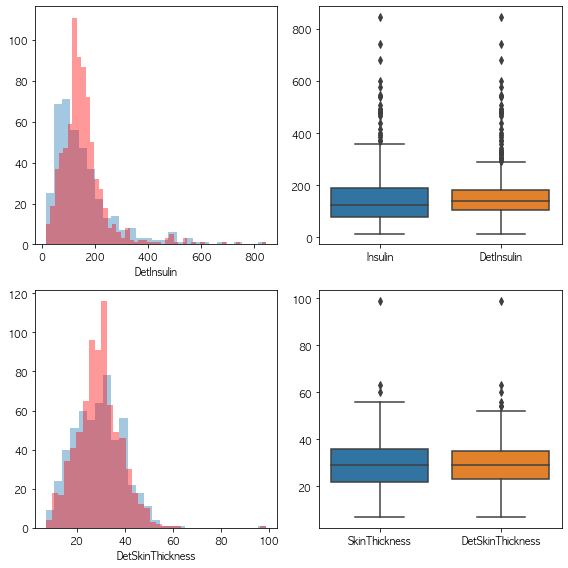

In [44]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde=False, ax=axes[index, 0], color='red') 
    sns.boxplot(data = pd.concat([diabetes[variable], deter_data["Det" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

In [45]:
### Single Stochastic Imputation
random_data = pd.DataFrame(columns=["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = diabetes[feature + '_imp']
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(diabetes[parameters])
    std_error = (predict[diabetes[feature].notnull()] - diabetes.loc[diabetes[feature].notnull(), feature + '_imp']).std()
    
    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size=diabetes[feature].shape[0], loc = predict, scale = std_error)
    random_data.loc[(diabetes[feature].isnull()) & (random_predict > 0),
                    "Ran" + feature] = random_predict[(diabetes[feature].isnull()) & (random_predict > 0)]

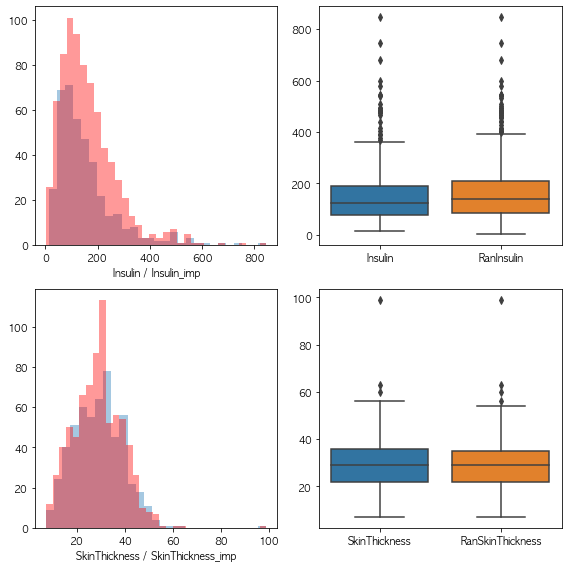

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde=False, ax=axes[index, 0], color='red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    sns.boxplot(data = pd.concat([diabetes[variable], random_data["Ran" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

## Duplicates

In [47]:
### 중복 삭제
health['키'].drop_duplicates().tolist()

[160.0, 162.0, 165.0, 166.0]

In [48]:
set(health['키'])

{160.0, 162.0, 165.0, 166.0}

In [49]:
health[['시력','병결']].drop_duplicates() # 모든 컬럼이 같은 경우에만 제거

,시력,병결
0,1.2,0.0
3,1.2,2.0
4,1.1,0.0
5,0.8,1.0


In [50]:
health.drop_duplicates(subset=['시력']) # 특정 컬럼 기준 drop

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [51]:
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [52]:
# find duplicates
health[health.duplicated(subset=['시력', '병결'], keep='first')]

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0


In [53]:
# find all duplicates (include first)
pd.concat([health[health.duplicated(subset=['시력', '병결'], keep='first')], 
           health[health.duplicated(subset=['시력', '병결'], keep='last')]]).drop_duplicates()

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
0,2017,160.0,53.0,1.2,0.0


## Outlier

### (1) Outlier detect

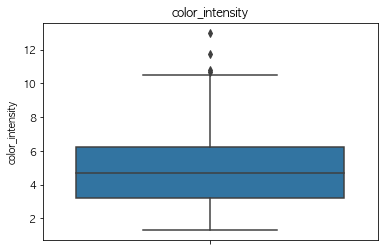

In [54]:
### Boxplot 확인
sns.boxplot(y=wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [55]:
### Outlier detect function
def outliers_iqr(df, column):
    quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    
    outliers = df[(df[column] > upper_whis) | (df[column] < lower_whis)]
    
    return outliers[[column]]

In [56]:
outliers = outliers_iqr(df=wine, column='color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


In [57]:
### DBSCAN
# -1로 클러스터링 된 데이터를 outlier로 함
# DBSCAN 부분 참고

### (2) Outlier cleansing

In [58]:
### Trimming
# Outlier 삭제
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [59]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN # Outlier를 NA로 만든 다음, 대체
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean()) # 평균 치환
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

In [60]:
### Winsorizing (조정), Clipping
# 상/하한을 정하고, 넘는 값을 상/하한으로 조정

In [61]:
from scipy.stats.mstats import winsorize

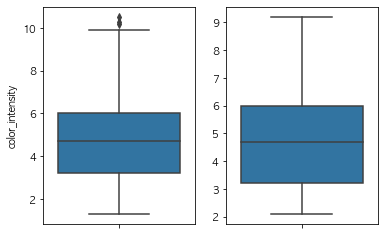

In [62]:
winsorized = winsorize(wine['color_intensity'], (0.05, 0.05))

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=wine['color_intensity'], ax=axes[0])
sns.boxplot(y=winsorized, ax=axes[1])
plt.show()

## Categorical data
- 범주형 변수의 수학적 연산이 가능하게끔 함: Dummy 변수 생성
- Label(Ordinal) encoding, One-hot encoding
- LabelBinarizer는 sparse matrix의 One-hot encoding에 사용

In [63]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

### (1) LabelEncoder, OrdinalEncoder
- cat -> num
- target을 숫자로 변환하는 데 용이하며, ML 모델에 사용하기에는 적합하지 않음

In [64]:
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [65]:
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [66]:
### OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

### (2) LabelBinarizer
- Sparse One-hot encoding

In [67]:
lb = LabelBinarizer(sparse_output=True)
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(sparse_output=True)

In [68]:
lb.classes_

array([1, 2, 4, 6])

In [69]:
lb.transform([1, 6]).toarray()

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

In [70]:
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))
lb.classes_

array([0, 1, 2])

In [71]:
lb.transform([0, 1, 2, 1]).toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

### (3) One-hot encoder

In [72]:
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [73]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [74]:
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [75]:
# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


In [76]:
### get_dummies
dummy_col = pd.get_dummies(item_df)
dummy_col

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [77]:
# 생성된 dummy의 T/F를 1/0으로 변경
for col in dummy_col:
    dummy_col[col] = np.where(dummy_col[col], 1, 0)
    
pd.get_dummies(iris, columns=['Class'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [78]:
pd.get_dummies(iris, columns=['Class'], drop_first=True)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


### (4) Frequency Encoding
- Category의 빈도에 따른 encoding
- 중복되는 값이 나올 수 있음

In [79]:
item_df.groupby('item').size() / len(item_df)

item
TV       0.125
냉장고      0.125
믹서       0.250
선풍기      0.250
전자레인지    0.125
컴퓨터      0.125
dtype: float64

### (5) Target Encoding
- 특정 컬럼의 요약 값에 따른 encoding
- Frequency 방법의 확장판 

In [80]:
# sepal length의 평균에 따른 encoding
iris.groupby('Class')['sepal length (cm)'].mean()

Class
Setosa         5.006
Versicolour    5.936
Virginica      6.588
Name: sepal length (cm), dtype: float64

### (6) Feature Hashing
- FeatureHasher: Hashed array 반환

In [81]:
from sklearn.feature_extraction import FeatureHasher

In [82]:
h = FeatureHasher(n_features=10)

hash_data = [{'dog': 1, 'cat':2, 'elephant':4}, {'dog': 2, 'run': 5}]
f = h.transform(hash_data)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [83]:
h = FeatureHasher(n_features=8, input_type="string")

raw_x = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]

f = h.transform(raw_x)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Data Split
- ML 모델에서는 7:3또는 6:2:2가 권장되나, 최근 train 비율을 더 높이기도 함
- Cross-Validation 기법

### (1) Holdout

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
# train_test_split(x, y, test_size, random_state, shuffle, stratify)
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [86]:
x_train.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
2,4.7,3.2,1.3,0.2
103,6.3,2.9,5.6,1.8
109,7.2,3.6,6.1,2.5


In [87]:
y_train.head(3)

2         Setosa
103    Virginica
109    Virginica
Name: Class, dtype: object

In [88]:
iris['Class'].value_counts()

Setosa         50
Versicolour    50
Virginica      50
Name: Class, dtype: int64

In [89]:
y_train.value_counts() # class 불균형

Setosa         44
Virginica      39
Versicolour    37
Name: Class, dtype: int64

### (2) Stratified split

In [90]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris['Class'])
print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [91]:
y_train.value_counts()

Virginica      40
Versicolour    40
Setosa         40
Name: Class, dtype: int64

### (3) Shuffle split

In [92]:
from sklearn.model_selection import ShuffleSplit

In [93]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


In [94]:
for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0 4]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2 5]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4 0]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1 0]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1 0]
  Test:  index=[2 4]


In [95]:
# Specify train and test size
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1]
  Test:  index=[2 4]


### (4) Cross-validation

#### K-Fold

In [96]:
from sklearn.model_selection import KFold

In [97]:
kf = KFold(n_splits=5)
kf.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [98]:
iris_features = iris.drop(columns='Class', axis=1)
iris_label = iris['Class']

for i, (train_index, test_index) in enumerate(kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 1

#### Stratified K-Fold

In [99]:
from sklearn.model_selection import StratifiedKFold

In [100]:
s_kf = StratifiedKFold(n_splits=5)
s_kf.get_n_splits(X=iris_features, y=iris_label)
s_kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [101]:
for i, (train_index, test_index) in enumerate(s_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]
    
    print('학습 레이블 데이터 분포:\n', y_train.value_counts())
    print('검증 레이블 데이터 분포:\n', y_test.value_counts())

Fold 0:
  Train: index=[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
학습 레이블 데이터 분포:
 Setosa         40
Versicolour    40
Virginica      40
Name: Class, dtype: int64
검증 레이블 데이터 분포:
 Setosa         10
Versicolour    10
Virginica      10
Name: Class, dtype: int64
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  4

#### Group K-Fold

In [102]:
from sklearn.model_selection import GroupKFold

In [103]:
x = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(x, y, groups)

3

In [104]:
for train_index, test_index in gkf.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1 2 3 4 5] TEST: [6 7 8 9]
x_train: [0.1  0.2  2.2  2.4  2.3  4.55] 
x_test: [ 5.8  8.8  9.  10. ]
y_train: ['a' 'b' 'b' 'b' 'c' 'c'] 
y_test: ['c' 'd' 'd' 'd']
TRAIN: [0 1 2 6 7 8 9] TEST: [3 4 5]
x_train: [ 0.1  0.2  2.2  5.8  8.8  9.  10. ] 
x_test: [2.4  2.3  4.55]
y_train: ['a' 'b' 'b' 'c' 'd' 'd' 'd'] 
y_test: ['b' 'c' 'c']
TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
x_train: [ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] 
x_test: [0.1 0.2 2.2]
y_train: ['b' 'c' 'c' 'c' 'd' 'd' 'd'] 
y_test: ['a' 'b' 'b']


In [105]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

groups = np.array([0, 0, 2, 2])
group_kfold = GroupKFold(n_splits=2)

group_kfold.get_n_splits(x, y, groups)

print(group_kfold)

GroupKFold(n_splits=2)


In [106]:
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1] TEST: [2 3]
x_train: [[1 2]
 [3 4]] 
x_test: [[5 6]
 [7 8]]
y_train: [1 2] 
y_test: [3 4]
TRAIN: [2 3] TEST: [0 1]
x_train: [[5 6]
 [7 8]] 
x_test: [[1 2]
 [3 4]]
y_train: [3 4] 
y_test: [1 2]


In [107]:
group_kfold.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
group_kfold

GroupKFold(n_splits=2)

## Scaling
- 표준화 (Standardization): 표준정규분포화
- 정규화 (Normalization): 범위 지정 (보통 0-1)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import QuantileTransformer

In [109]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

### (1) Standard
- Classification에서 유용

In [110]:
std_scaler = StandardScaler()

x_train_sc = std_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = std_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.46, 3.17) (0.00, 1.00)
Test_scaled (-1.99, 2.70) (-0.04, 1.05)


In [111]:
#scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.422806,-1.049936,0.350710,-0.027652
1,-0.907165,-1.284559,-0.456403,-0.160379
2,-0.059536,-0.815314,0.062455,-0.027652
3,-0.543896,2.000158,-1.436468,-1.089469
4,0.545914,-1.753804,0.350710,0.105076


### (2) MinMax
- Regression에서 유용

In [112]:
mm_scaler = MinMaxScaler()

x_train_sc = mm_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = mm_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (-0.03, 0.96) (0.43, 0.27)


In [113]:
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.314286,0.250000,0.576271,0.458333
1,0.200000,0.208333,0.338983,0.416667
2,0.400000,0.291667,0.491525,0.458333
3,0.285714,0.791667,0.050847,0.125000
4,0.542857,0.125000,0.576271,0.500000


### (3) MaxAbs

In [114]:
ma_scaler = MaxAbsScaler()

x_train_sc = ma_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = ma_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.23)
Test_scaled (0.04, 0.96) (0.60, 0.25)


### (4) Robust
- 이상치가 있는 데이터의 경우
- quantile_range 파라미터 조정 가능 (default [0.25, 0.75])

In [115]:
robust_scaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
x_train_sc = robust_scaler.fit_transform(x_train)
x_test_sc = robust_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.02, 0.65)
Test_scaled (-1.60, 2.40) (-0.03, 0.69)


### (5) Quantile
- output_distribution -> uniform, normal

In [116]:
q_scaler = QuantileTransformer()

x_train_sc = q_scaler.fit_transform(x_train)
x_test_sc = q_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.50, 0.29)
Test_scaled (0.00, 0.99) (0.49, 0.30)


### (6) Scale revert

In [117]:
x_original = q_scaler.inverse_transform(x_train_sc)
pd.DataFrame(x_original).head(3)

,0,1,2,3
0,5.5,2.6,4.4,1.2
1,5.1,2.5,3.0,1.1
2,5.8,2.7,3.9,1.2


In [118]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
48,5.3,3.7,1.5,0.2
29,4.7,3.2,1.6,0.2
145,6.7,3.0,5.2,2.3
129,7.2,3.0,5.8,1.6


### (7) Scale and split
- train data에 fit, test data는 train 기준으로 변환 (권장)
- 변환 수행 후 분할

In [119]:
# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [120]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [121]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [122]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## Transformation

### (1) Log Transformation
- Skewness 감소, 이상치 영향 감소 효과
- Target(y)에 적용 시 성능 증가 효과

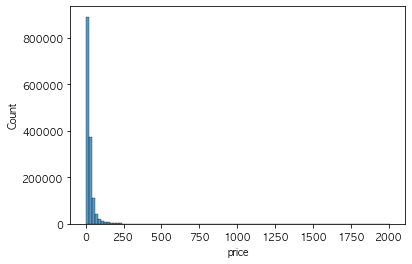

In [123]:
### mercari price data
plt.figure(figsize=(6, 4))
sns.histplot(y_train_df, bins=100)
plt.show()

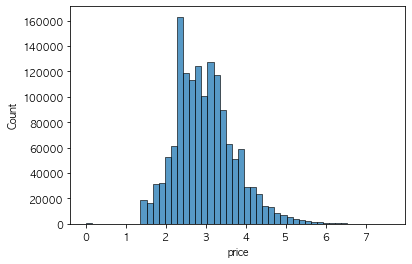

In [124]:
y_train_df = np.log1p(y_train_df)
sns.histplot(y_train_df, bins=50)
plt.show()

### (2) Exponential Transformation
- Log Transformation의 반대 연산

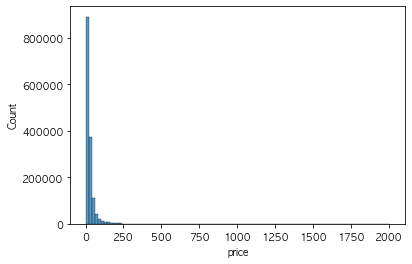

In [125]:
y_train_df = np.exp(y_train_df)
sns.histplot(y_train_df, bins=100)
plt.show()

### (3) Rank
- 순위 값으로 치환
- 비모수적 통계 적용할때 많이 사용

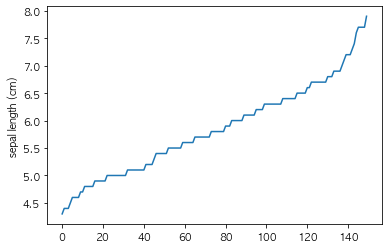

In [126]:
sepal_length = iris['sepal length (cm)'].sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length)
plt.show()

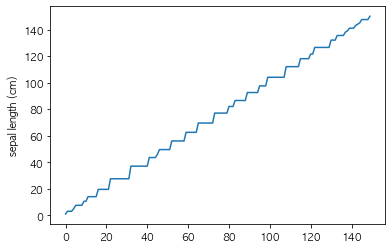

In [127]:
sepal_length_rank = iris['sepal length (cm)'].rank().sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length_rank)
plt.show()

### (4) Binning
- 구간 분할하여 categorical data로 변환
- cut 함수의 input은 numpy array

In [128]:
# 동일 길이로 나누기
bins = pd.cut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.296, 5.5]",59,0.393333
"(5.5, 6.7]",71,0.473333
"(6.7, 7.9]",20,0.133333


In [129]:
# 구간 값 정하고, 라벨 추가
bins = pd.cut(iris['sepal length (cm)'].values, bins=[4, 5, 6, 7, 8], labels=['bad', 'soso', 'med', 'good'])
bins.describe()

,counts,freqs
categories,,
bad,32,0.213333
soso,57,0.380000
med,49,0.326667
good,12,0.080000


In [130]:
# 동일 개수로 나누기
bins = pd.qcut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.4]",52,0.346667
"(5.4, 6.3]",56,0.373333
"(6.3, 7.9]",42,0.280000


In [131]:
# 구간에 들어갈 비율 조정
bins = pd.qcut(iris['sepal length (cm)'].values, [0, 0.25, 0.75, 1]) 
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.1]",41,0.273333
"(5.1, 6.4]",74,0.493333
"(6.4, 7.9]",35,0.233333


## Imbalance
- Under-sampling: 데이터 개수 감소로 인한 성능 저하 주의
- Over-sampling: 성능에 유리하나, Overfitting 가능성이 있음
- SMOTE: 소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성. Recall 상승에 최적이며 K-NN을 사용하므로 수치형 데이터에 사용하는 것이 좋음. 일반적인 Over-sampling보다 시간 소요가 긴 편
    - SMOTEN: Nominal (Categorical) data
    - SMOTENC: Nominal and Continuous data. categorical_features를 리스트 형태의 파라미터로 제시해야 함
- BorderlineSMOTE: Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것
    - 소수 범주의 데이터 한 개에 대해서 주변의 K개 데이터를 탐색하고 그중 다수 범주 데이터의 수를 확인
    - 주변 K개 데이터 중 다수 범주 데이터의 수가 K/2 ~ K 에 속할 경우 Danger 관측치라고 하는데, 이 관측치에 대해서만 SMOTE 적용
- ADASYN (Adaptive Synthetic Sampling): Borderline SMOTE 방법과 유사하나, 샘플링 개수를 데이터 위치에 따라 다르게 설정함
    - 모든 소수 범주 데이터에 대해 주변의 K개의 데이터를 탐색하고 다수 범주 데이터의 비율 계산
    - 소수 범주 데이터 주변의 다수 범주 데이터의 수에 따라 유동적으로 생성 가능
- SVMSMOTE: SVM의 hyperplane 경계면에 minor class 데이터 생성
- KMeansSMOTE: 데이터를 우선 클러스터링하여 minor class 데이터 주변으로 synthetic 데이터 생성
    - 전체 데이터 (major + minor)에 대해 KMeans clustering 수행 (default k=2)
    - major class의 데이터가 포함된 cluster는 oversampling 대상에서 제외
    - minor class 데이터만 존재하는 cluster에 대해 그 주변 값으로 synthetic data generate
- Weight 조정: 모델링 시 sample_weight 입력하여 적은 클래스의 가중치를 높임
- Default sampling strategy는 'not majority': 모든 클래스를 majority class의 크기로 맞춤

In [132]:
# ! pip install imblearn
from sklearn.datasets import make_classification
from collections import Counter

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

In [133]:
### Data generate
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
print(Counter(y))

Counter({0: 1900, 1: 100})


### (1) Random Under-sampling

In [134]:
undersample=RandomUnderSampler(sampling_strategy='majority') # 가장 작은 사이즈에 맞춤
x_under, y_under = undersample.fit_resample(x, y)
print(Counter(y_under))

Counter({0: 100, 1: 100})


In [135]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # 2:1 비율로
x_under2, y_under2 = undersample.fit_resample(x, y)
print(Counter(y_under2))

Counter({0: 200, 1: 100})


### (2) Random Over-sampling

In [136]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 950})


In [137]:
oversample = RandomOverSampler(sampling_strategy='minority') # 작은 사이즈 클래스를 큰 사이즈에 맞춤
x_over, y_over = oversample.fit_resample(x, y)
print(Counter(y_over))

Counter({0: 1900, 1: 1900})


### (3) SMOTE

In [138]:
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
print(Counter(y_sm))

Counter({0: 1900, 1: 1900})


### (4) Borderline SMOTE

In [139]:
b_smote_sample = BorderlineSMOTE(sampling_strategy='minority') 
x_bsm, y_bsm = b_smote_sample.fit_resample(x, y)
print(Counter(y_bsm))

Counter({0: 1900, 1: 1900})


### (5) ADASYN (Adaptive Synthetic Sampling)

In [140]:
adasyn_sample = ADASYN(sampling_strategy='minority') 
x_ada, y_ada = adasyn_sample.fit_resample(x, y)
print(Counter(y_ada))

Counter({0: 1900, 1: 1894})


### (6) SVM SMOTE

In [141]:
svm_smote_sample = SVMSMOTE(sampling_strategy='minority') 
x_ssm, y_ssm = svm_smote_sample.fit_resample(x, y)
print(Counter(y_ssm))

Counter({0: 1900, 1: 1900})


### (7) K-means SMOTE

In [142]:
kmeans_smote_sample = KMeansSMOTE(sampling_strategy='minority', cluster_balance_threshold=0.1) 
x_ksm, y_ksm = kmeans_smote_sample.fit_resample(x, y)
print(Counter(y_ksm))

Counter({0: 1900, 1: 1900})


### (8) Sampling Visualization

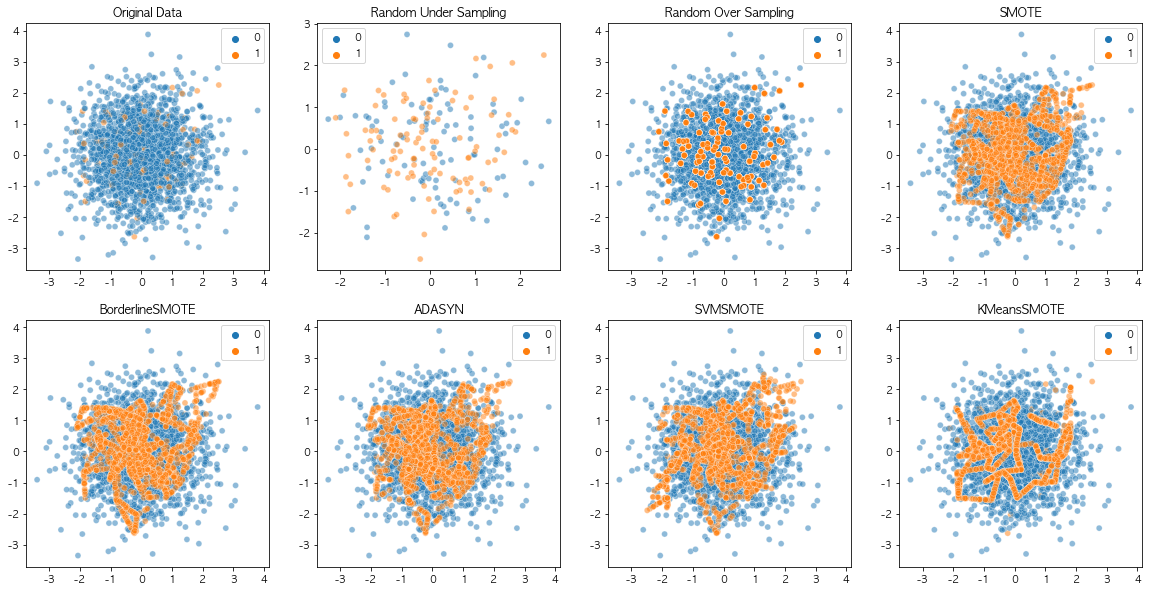

In [143]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:, 1], y=x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], hue=y_over, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[0][3], alpha=0.5)
sns.scatterplot(x=x_bsm[:, 1], y=x_bsm[:, 2], hue=y_bsm, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_ada[:, 1], y=x_ada[:, 2], hue=y_ada, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_ssm[:, 1], y=x_ssm[:, 2], hue=y_ssm, ax=axes[1][2], alpha=0.5)
sns.scatterplot(x=x_ksm[:, 1], y=x_ksm[:, 2], hue=y_ksm, ax=axes[1][3], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[0][2].set_title('Random Over Sampling')
axes[0][3].set_title('SMOTE')
axes[1][0].set_title('BorderlineSMOTE')
axes[1][1].set_title('ADASYN')
axes[1][2].set_title('SVMSMOTE')
axes[1][3].set_title('KMeansSMOTE')

plt.show()

## Time-series Data
- 분해 시계열: 추세요인, 계절요인, 순환요인, 불규칙요인 (잔차)
- Multiplicative(추세에 따른 계절성이 있는 경우), Additvie(추세와 계절성이 별도로 존재하는 경우)

In [144]:
arima_data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [145]:
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


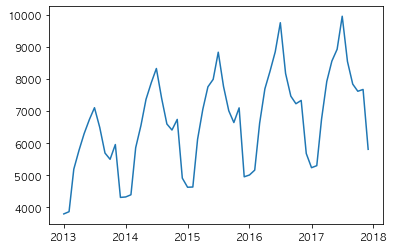

In [146]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [147]:
### ldeaths data
ldeaths.head()

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014


In [148]:
# 시간 변환
ldeaths['time'] = pd.Series([f'{y}-{m+1}' for y in range(1974, 1980) for m in range(12)])
ldeaths.head()

,time,value
0,1974-1,3035
1,1974-2,2552
2,1974-3,2704
3,1974-4,2554
4,1974-5,2014


In [149]:
from matplotlib import dates

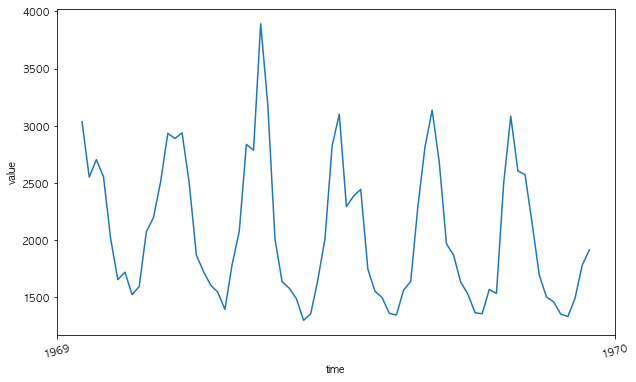

In [150]:
plt.figure(figsize=(10,6))
ax = plt.axes()            
plt.xticks(rotation=15)
    
ax.xaxis.set_major_locator(dates.DayLocator(interval=350))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

sns.lineplot(x='time', y='value', data=ldeaths, ax=ax)
plt.show()

In [151]:
ldeaths['time'] = pd.to_datetime(ldeaths['time'], format="%Y-%m")
ldeaths.set_index('time', inplace=True)
ldeaths.head(3)

,value
time,
1974-01-01,3035
1974-02-01,2552
1974-03-01,2704


### (1) Seasonal decomposition

In [152]:
from statsmodels.tsa.seasonal import seasonal_decompose

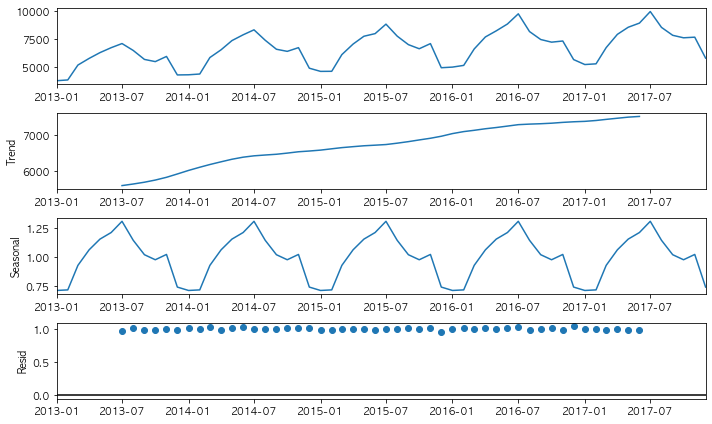

In [153]:
### Seasonal decomposition
ts = arima_data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

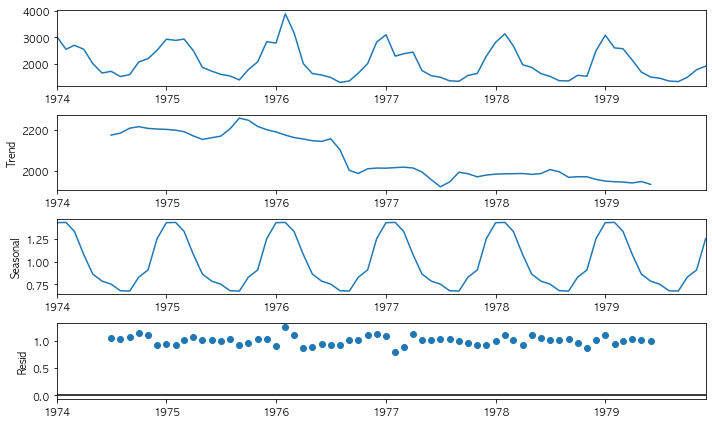

In [154]:
ts = ldeaths
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

### (2) Resample
- 시간 단위별로 grouping
    - Y, M, D, H, T(min), S등의 rule 지정
- 시간 컬럼을 index로 지정하거나, on parameter 이용
- groupby와 유사하며, groupby와 함께 이용하는 것도 가능

In [155]:
birth_data.reset_index(drop=False, inplace=True)

In [156]:
birth_data['Date'] = pd.to_datetime(birth_data['Date']) # DateTime으로 변경 후 index로 지정
# birth_data.set_index('Date', drop=True, inplace=True)
birth_data.head()

,index,Date,Births
0,0,1959-01-01,35
1,1,1959-01-02,32
2,2,1959-01-03,30
3,3,1959-01-04,31
4,4,1959-01-05,44


In [157]:
birth_data.resample(rule='2D', closed='right', label='right', on='Date').mean() # 2일 평균을 계산하되, 부등호와 label 값은 오른쪽(최신) 값으로

,index,Births
Date,,
1959-01-01,0.0,35.0
1959-01-03,1.5,31.0
1959-01-05,3.5,37.5
1959-01-07,5.5,37.0
1959-01-09,7.5,40.5
...,...,...
1959-12-23,355.5,39.5
1959-12-25,357.5,41.0
1959-12-27,359.5,35.5


In [158]:
birth_data.resample(rule='3M', on='Date').sum() # 3개월 단위로 sum

,index,Births
Date,,
1959-01-31,465,1213
1959-04-30,6675,3561
1959-07-31,15226,3720
1959-10-31,23690,4165
1960-01-31,20374,2664


### (3) Upsampling/Downsampling
- Resample 메소드를 사용한 시간 단위 변경

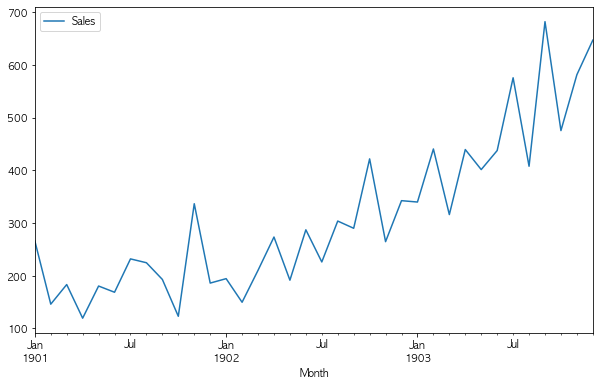

In [159]:
shampoo.plot()
plt.show()

#### Upsampling

In [160]:
upsampled = shampoo.resample('D').mean() # Day frequency
upsampled

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
...,...
1903-11-27,NaN
1903-11-28,NaN
1903-11-29,NaN


In [161]:
print(shampoo.shape, upsampled.shape)

(36, 1) (1065, 1)


In [162]:
ts_upsample = ts.resample('S').mean() # Second frequency로 평균 시간 만들기
ts_upsample

,value
time,
1974-01-01 00:00:00,3035.0
1974-01-01 00:00:01,NaN
1974-01-01 00:00:02,NaN
1974-01-01 00:00:03,NaN
1974-01-01 00:00:04,NaN
...,...
1979-11-30 23:59:56,NaN
1979-11-30 23:59:57,NaN
1979-11-30 23:59:58,NaN


In [163]:
rng = pd.date_range('2019-12-31', periods=3, freq='5S')
ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3, 2), index=rng, columns=['col_1', 'col_2'])
ts

,col_1,col_2
2019-12-31 00:00:00,0,1
2019-12-31 00:00:05,3,2
2019-12-31 00:00:10,10,3


#### Downsampling (merge)

In [164]:
resample = shampoo.resample('Q') # Quarter-aware
quarterly_mean_sales = resample.mean()

In [165]:
quarterly_mean_sales.shape

(12, 1)

In [166]:
# Time 단위 downsampling
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)

In [167]:
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [168]:
series.resample('3T').sum() # 3시간 단위로 sum 하되, label은 가장 빠른 시간으로

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [169]:
series.resample('3T', label='right').sum() # label을 마지막 시간으로

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [170]:
series.resample('3T', label='right', closed='right').sum() # 오른쪽 부등호에 등호 붙이기

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

### (4) Missing Value

#### Fill NA

In [171]:
# ts_upsample.ffill()
# 앞의 값으로 채우기
ts_upsample.fillna(method='ffill')

,value
time,
1974-01-01 00:00:00,3035.0
1974-01-01 00:00:01,3035.0
1974-01-01 00:00:02,3035.0
1974-01-01 00:00:03,3035.0
1974-01-01 00:00:04,3035.0
...,...
1979-11-30 23:59:56,1781.0
1979-11-30 23:59:57,1781.0
1979-11-30 23:59:58,1781.0


In [172]:
# ts_upsample.bfill()
# 뒤의 값으로 채우기
ts_upsample.fillna(method='bfill')

,value
time,
1974-01-01 00:00:00,3035.0
1974-01-01 00:00:01,2552.0
1974-01-01 00:00:02,2552.0
1974-01-01 00:00:03,2552.0
1974-01-01 00:00:04,2552.0
...,...
1979-11-30 23:59:56,1915.0
1979-11-30 23:59:57,1915.0
1979-11-30 23:59:58,1915.0


In [173]:
# 평균으로 채우기 
ts_upsample.fillna(ts_upsample.mean())

,value
time,
1974-01-01 00:00:00,3035.000
1974-01-01 00:00:01,2056.625
1974-01-01 00:00:02,2056.625
1974-01-01 00:00:03,2056.625
1974-01-01 00:00:04,2056.625
...,...
1979-11-30 23:59:56,2056.625
1979-11-30 23:59:57,2056.625
1979-11-30 23:59:58,2056.625


In [174]:
# 중앙값으로 채우기 
ts_upsample.fillna(ts_upsample.median())

,value
time,
1974-01-01 00:00:00,3035.0
1974-01-01 00:00:01,1870.0
1974-01-01 00:00:02,1870.0
1974-01-01 00:00:03,1870.0
1974-01-01 00:00:04,1870.0
...,...
1979-11-30 23:59:56,1870.0
1979-11-30 23:59:57,1870.0
1979-11-30 23:59:58,1870.0


#### Interpolation
- 시계열 데이터의 앞, 뒤 데이터 확인하여 결측치 보정

In [175]:
ts_upsample.interpolate(method='values') # 값 기준 선형 보간

,value
time,
1974-01-01 00:00:00,3035.000000
1974-01-01 00:00:01,3034.999820
1974-01-01 00:00:02,3034.999639
1974-01-01 00:00:03,3034.999459
1974-01-01 00:00:04,3034.999279
...,...
1979-11-30 23:59:56,1914.999793
1979-11-30 23:59:57,1914.999845
1979-11-30 23:59:58,1914.999897


In [176]:
ts_upsample.interpolate(method='time') # 시간 기준 선형 보간

,value
time,
1974-01-01 00:00:00,3035.000000
1974-01-01 00:00:01,3034.999820
1974-01-01 00:00:02,3034.999639
1974-01-01 00:00:03,3034.999459
1974-01-01 00:00:04,3034.999279
...,...
1979-11-30 23:59:56,1914.999793
1979-11-30 23:59:57,1914.999845
1979-11-30 23:59:58,1914.999897


In [177]:
upsampled.interpolate(method='linear') # 선형으로 값 채우기

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [178]:
upsampled.interpolate(option='spline') # smooth surface 보간

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [179]:
# dataframe with index as timeseries
time_sdata = pd.date_range("09/10/2021", periods=9, freq="W")

df = pd.DataFrame(index=time_sdata)
# there are four missing values
df["example"] = [10001.0, 10002.0, 10003.0, np.nan, 10004.0, np.nan, np.nan, 10005.0, np.nan]
df

,example
2021-09-12,10001.0
2021-09-19,10002.0
2021-09-26,10003.0
2021-10-03,NaN
2021-10-10,10004.0
2021-10-17,NaN
2021-10-24,NaN
2021-10-31,10005.0
2021-11-07,NaN


In [180]:
df.interpolate()

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,10005.000000


In [181]:
# Interpolating Missing Values to two values
# forward 방향으로 1개까지 Missing data 처리 (보간 개수 제한)
df.interpolate(limit=1, limit_direction="forward")

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,NaN
2021-10-31,10005.000000
2021-11-07,10005.000000


In [182]:
# 아래에서 위로 보간
df.interpolate(method='values', limit=1, limit_direction='backward')

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,NaN
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,NaN


### (5) Shift & Rolling

In [185]:
arima_data['price'].shift(3).head() # price의 값을 3칸 아래로 이동

day
2013-01-01       NaN
2013-02-01       NaN
2013-03-01       NaN
2013-04-01    3794.0
2013-05-01    3863.0
Name: price, dtype: float64

In [183]:
arima_data['price'].rolling(3).mean().head() # price의 과거 3개 값의 평균

day
2013-01-01            NaN
2013-02-01            NaN
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [184]:
arima_data['price'].rolling(3, min_periods=1).mean().head() # min_periods : 1, 2행을 과거 1, 2행 값만으로 계산

day
2013-01-01    3794.000000
2013-02-01    3828.500000
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [186]:
### get smoothing (MA) line
# computing a 7 day rolling average
birth_data['7day_rolling_avg'] = birth_data.Births.rolling(7).mean()

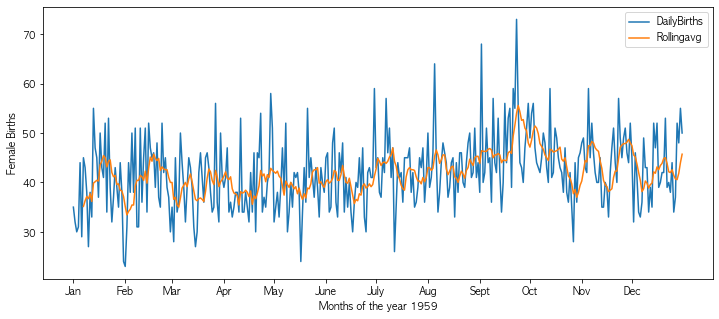

In [187]:
# set figure size
plt.figure(figsize=(12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x='Date', y='Births', data=birth_data, label='DailyBirths')

# plot using rolling average
sns.lineplot(x='Date', y='7day_rolling_avg', data=birth_data, label='Rollingavg')
plt.xlabel('Months of the year 1959')
  
# setting customized ticklabels for x axis
pos = ['1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01', 
       '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
       '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01']
lab = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
  
plt.xticks(pos, lab)
plt.ylabel('Female Births')
plt.show()